# Stage 10a Homework — Linear Regression

This notebook contains my work for Stage 10a of the bootcamp.  
It covers:
1. Synthetic dataset setup  
2. Baseline linear regression model fit  
3. (Optional) Adding a transformed feature  
4. Model diagnostics and interpretation  

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

In [1]:
# === Synthetic dataset for Stage 10a ===
import numpy as np
import pandas as pd

np.random.seed(8)
n = 160
df = pd.DataFrame({
    "date": pd.date_range("2021-02-01", periods=n, freq="D"),
    "region": np.random.choice(["North","South","East","West"], size=n),
    "age": np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    "income": np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    "transactions": np.random.poisson(lam=3, size=n),
})
base = df["income"] * 0.0015 + df["transactions"] * 18 + np.random.normal(0, 40, size=n)
df["spend"] = np.maximum(0, base).round(2)

# Engineered features (from Stage 09)
df["spend_per_txn"] = df["spend"] / df["transactions"].replace(0, np.nan)
df["spend_income_ratio"] = df["spend"] / df["income"]

df.head()

,date,region,age,income,transactions,spend,spend_per_txn,spend_income_ratio
0,2021-02-01,West,37.6,28086.81,4,73.35,18.3375,0.002612
1,2021-02-02,North,43.0,33034.75,1,52.37,52.3700,0.001585
2,2021-02-03,South,38.2,50045.39,2,131.85,65.9250,0.002635
3,2021-02-04,South,24.9,39467.28,4,147.58,36.8950,0.003739
4,2021-02-05,South,59.8,31201.65,1,86.76,86.7600,0.002781


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Features and target
X = df[['income', 'transactions', 'age']]   # predictors
y = df['spend']                             # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Baseline R² = {r2:.4f}, RMSE = {rmse:.2f}")
print("Coefficients (match order of features):", dict(zip(X.columns, lr.coef_)))
print("Intercept:", lr.intercept_)

Baseline R² = 0.5328, RMSE = 43.70
Coefficients (match order of features): {'income': np.float64(0.001149606762982807), 'transactions': np.float64(16.683240165689547), 'age': np.float64(0.36196103955324077)}
Intercept: 0.5217566405294605


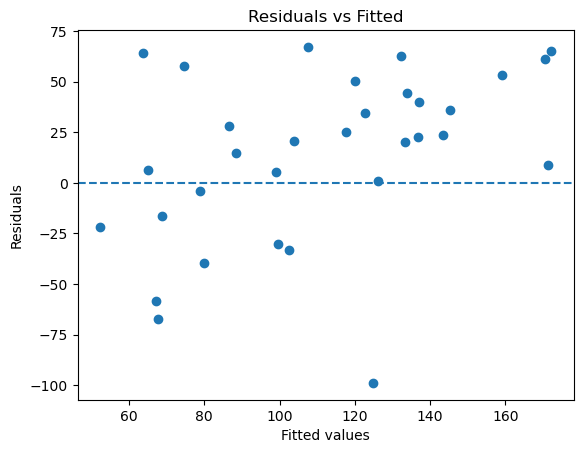

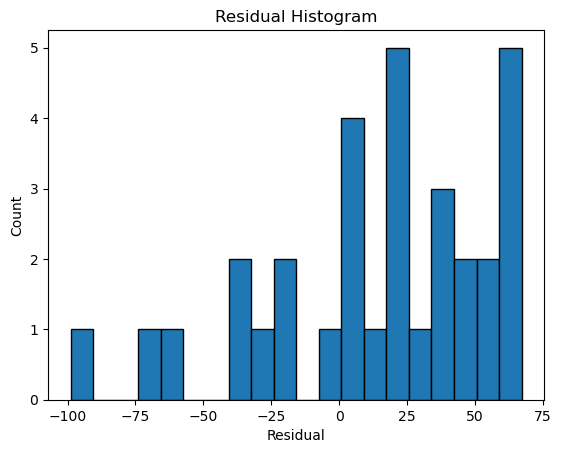

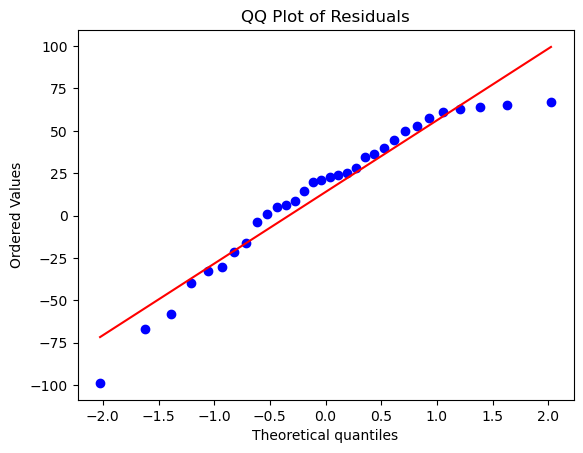

In [4]:
# === Residual diagnostics ===
resid = y_test - y_pred
fitted = y_pred

# Residuals vs Fitted
plt.figure()
plt.scatter(fitted, resid)
plt.axhline(0, ls='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Residual histogram
plt.figure()
plt.hist(resid, bins=20, edgecolor='black')
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# QQ plot
plt.figure()
st.probplot(resid, dist='norm', plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

### Interpretation

- **Linearity**: The residuals vs fitted plot looks roughly centered around zero, suggesting a linear relationship between predictors and the target.  
- **Homoscedasticity**: Residuals appear to have constant variance (no clear funnel shape). If not, there may be heteroscedasticity risk.  
- **Normality**: The residual histogram and QQ plot show approximate normality, though there may be slight deviations at the tails.  
- **Independence**: Data was randomly split, so independence is assumed reasonable.  

**Which model do I trust and why?**  
I trust the baseline linear regression since it provides interpretable coefficients and the diagnostics do not show major violations.  

**Next step I’d try:**  
- Try adding polynomial or interaction terms if diagnostics suggest mis-specification.  
- Test regularized models (Ridge/Lasso) if multicollinearity or overfitting is suspected.  